Arquivo url_eaj2.txt criado com sucesso.
Gerando wordCloud


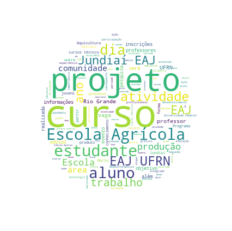

In [2]:
#QUESTAO 03
import time
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver

options = webdriver.FirefoxOptions()
options.add_argument('headless')

#PARTE 1 - CRIAR ARQUIVO TXT PARA ARMAZENAR OS LINKS

driver = webdriver.Firefox(executable_path = r'C:/Users/Anderson/Downloads/geckodriver-v0.29.0-win64/geckodriver.exe', options = options)
#URL DE ONDE SERAO RETIRADOS OS LINKS
urlLinks = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj'
driver.get(urlLinks)

try:
    #ABRE E CRIA O ARQUIVO ONDE SERÃO ARMAZENADAS AS URL'S
    f= open("url_eaj2.txt","w+")
    body = driver.find_element_by_tag_name('body')
    html = body.get_attribute('innerHTML')
    soupPage = soup(html, 'html5lib')
    #PEGA A QUANTIDADE DE PÁGINAS TOTAL DO FILTRO DE PESQUISA
    finalPage = int(driver.find_element_by_xpath("/html/body/div[3]/div/div[1]/section/section/nav/ul/li[8]/a").text)
    for pages in range (finalPage): 
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        #CRIA UMA ARRAY LIST COM OS LINKS PARA CADA NOTICIA
        aList = soupPage.findAll("a", class_='blue-link')
        
        #MONTA AS URL'S PARA CADA NOTICIA E ADICIONA AO TXT
        for n in range(2,len(aList)):
            link = 'https://ufrn.br/' + aList[n].get('href') + "\n"
            f.write(link)       
        #CHAMA A PROXIMA PAGINA
        driver.find_element_by_xpath("//a[contains(text(),'>')]").click()
        #TEMPO PARA AGUARDAR O CARREGAMENTO DA PROXIMA PAGINA
        time.sleep(2)
    f.close()    
except Exception as e:
    print(e)
    
print('Arquivo url_eaj2.txt criado com sucesso.')

#PARTE 2 - FAZER A RASPAGEM DE DADOS A PARTIR DOS LINKS CONTIDOS NO TXT CRIADO ACIMA

def getList(urlList):
    temp = ""
    try:
        #GERA UM DOCUMENTO QUE CONCATENA OS TEXTOS DE TODAS AS SPANS DE CADA NOTICIA
        for n in range(len(urlList)):
            driver.get(urlList[n])
            spanList = driver.find_elements_by_css_selector("span[style='font-weight: 400;']")
            for n in range(len(spanList)):
                temp += " "+spanList[n].text 
            temp += "\n\n"
        return temp
    except Exception as e:
        print(e) 
    print('Raspagem de dados finalizada.')

urlList = []

#ABRE O TXT COM AS URLS
f = open("url_eaj2.txt", "r")
for x in f:
    urlList.append(x.rstrip("\n"))
    
bigText = getList(urlList)
driver.close()

#PARTE 3 - GERAR A WORDCLOUD

from wordcloud import WordCloud, STOPWORDS

STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'toda', 'todo', 'estão',
             'está', 'pela', 'pelo', 'fazer', 'foram', 'sendo', 'está',
             'à', 'serão', 'foi', 'ser', 'tem', 'nos', 'sobre', 'cada',
             'todos', 'abriu', 'vão', 'até', 'abriu', 'ofertando', 'com',
             'anexo', '1º', 'minha', 'selecionar', 'escolher',
             'possível', 'nesse', 'todas', 'falou', 'outros',
             'recém', 'através']

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

def create_wordCloud(text):
    maskArray = np.array(Image.open("circle.jpg"))
    circle = WordCloud(background_color = "white",max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    circle.generate(text)
    circle.to_file("wordCloud_circle.jpg")
    print("Gerando wordCloud")
    time.sleep(2)
    plt.figure()
    plt.imshow(circle, interpolation='bilinear')
    plt.axis('off')
create_wordCloud(bigText)